# Analysis of filter circuit

This notebook analyses the filter in the circuit diagram below:

![Circuit Diagram of filter](assets/images/circuit.png)

Now onto our filter. See handwritten notes for complete derivation but the transfer function $H(s)$ is:

$$H(s) = \frac{u_{in}}{u_{out}} =  \frac{CLR \cdot s^2 + R}{CLR \cdot s^2 + Ls + R}$$

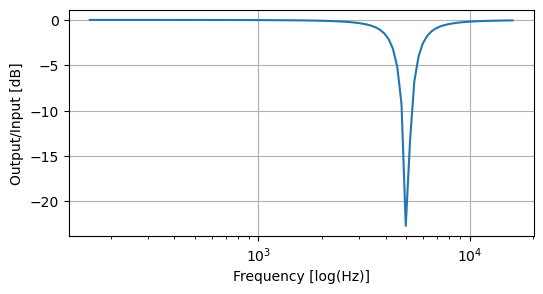

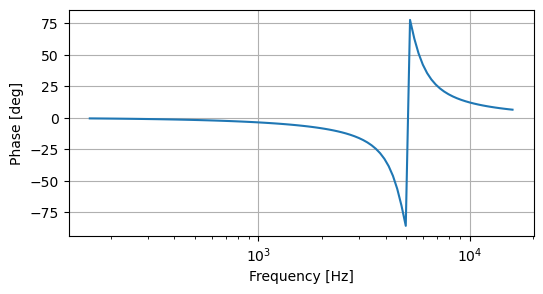

In [15]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

R = 5000
C = 20 * 10**(-9)
L = 50 * 10**(-3)

numerator = [C*L*R, 0, R]
denominator = [C*L*R, L, R]

LTI = signal.TransferFunction(numerator,denominator)

w, mag, phase = signal.bode(LTI)

# Convert rad/s to Hz
f=w/(2*np.pi)

plt.figure(figsize=(6, 3), dpi=100)
plt.semilogx(f,mag)
#plt.hlines(-3,min(f),max(f),linestyles="dotted",colors='r')
plt.xlabel('Frequency [log(Hz)]')
plt.ylabel('Output/Input [dB]')
plt.grid()
plt.figure(figsize=(6, 3), dpi=100)
plt.semilogx(f, phase)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [deg]')
plt.grid()
plt.show()

See handwritten note for expression for step response. The basics are that we use a convolution of the Heavyside function with the impulse response for our LTI-system. We don't know and don't need to know the impulse response, we use the Laplace Transform to find the laplace transform of the step response and then invert it to find the actual step response. 

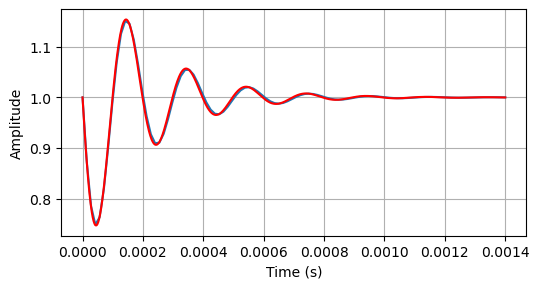

In [16]:
tDataLTI, yDataLTI = signal.step(LTI)

# Analytical expression
a = - 1 / (2*R*C)
b = np.sqrt(np.abs(L-4*R ** 2 * C /(4* R **2 * C ** 2 * L)))
c = np.sqrt(np.abs(L ** 2 - 4 * R ** 2 * C * L))

calcTransfer = lambda t : 1 - 2*L / (c) * np.exp(t*a) * np.sin(b * t)

# Plot function

tInput = np.linspace(min(tDataLTI),max(tDataLTI),1000)

plt.figure(figsize=(6, 3), dpi=100)
plt.plot(tDataLTI, yDataLTI)
plt.plot(tInput, calcTransfer(tInput), color='r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

The next part of the assignment is to calculate the output from with each of the first five terms in a square wave fourier-series. The period of the square wave used here is $T = 0.2 \textrm{ ms} = 2 \cdot 10^{-4} \textrm{ s}$, which corresponds to $\omega = \frac{2\pi}{2 \cdot 10^{-4}} \textrm{ rad/s}$.

$$ $$

Omega = 4999.999999999999 Hz
A_o1 = 0.05280188263942531
B_o1 = -87.623233687525 deg 

Omega = 1666.6666666666665 Hz
A_o2 = 0.42150762825758475
B_o2 = -6.7081953535465955 deg 

Omega = 999.9999999999999 Hz
A_o3 = 0.2541048280129935
B_o3 = -3.7426314735985926 deg 

Omega = 714.2857142857142 Hz
A_o4 = 0.18170087148826142
B_o4 = -2.622454266327295 deg 

Omega = 555.5555555555555 Hz
A_o5 = 0.14138281466604455
B_o5 = -2.0238278757122106 deg 

Omega = 454.5454545454545 Hz
A_o6 = 0.11570109321598233
B_o6 = -1.649364974390583 deg 

Omega = 384.6153846153846 Hz
A_o7 = 0.09791258034159517
B_o7 = -1.3924748232655213 deg 

Omega = 333.3333333333333 Hz
A_o8 = 0.08486386129517409
B_o8 = -1.2051092384995827 deg 

Omega = 294.11764705882354 Hz
A_o9 = 0.07488357043041037
B_o9 = -1.062330145391524 deg 



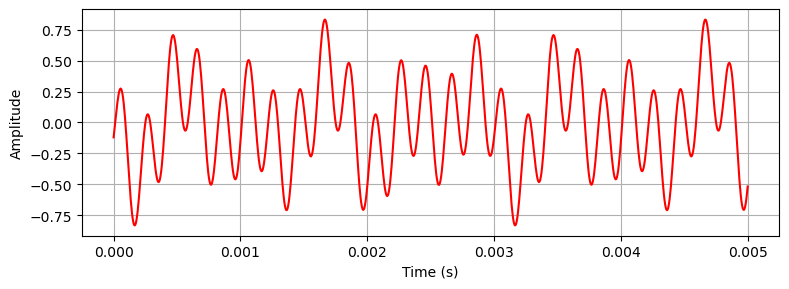

In [25]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

R = 5000
C = 20 * 10**(-9)
L = 50 * 10**(-3)

numerator = [C*L*R, 0, R]
denominator = [C*L*R, L, R]

# Square wave fourier terms
SwaveFrq = lambda n : np.pi/((2*n-1) * 10**-4)
SwaveAmp = lambda n : 4/(np.pi * (2*n-1))
Swaveterm = lambda n,t : SwaveAmp(n) * np.sin(SwaveFrq(n)*t)

# Evaluate transfer function
transferF = lambda s: np.polyval(numerator, s) / np.polyval(denominator, s)

Ao, Bo = list(), list()

for i in range(1,9 + 1):
    Ao.append(SwaveAmp(i)*np.absolute(transferF(1j*SwaveFrq(i))))
    Bo.append(np.angle(transferF(1j*SwaveFrq(i)), deg=True))
    print("Omega = " + str(SwaveFrq(i)/(2*np.pi)) + " Hz")
    print("A_o" + str(i) + " = " + str(SwaveAmp(i)*np.absolute(transferF(1j*SwaveFrq(i)))))
    #print("A_o" + str(i) + " = " + str(np.absolute(transferF(1j*SwaveFrq(i)))))
    print("B_o" + str(i) + " = " + str(np.angle(transferF(1j*SwaveFrq(i)), deg=True)) + " deg \n")

tInput = np.linspace(0,0.005,1000)
OutSine = lambda n, t, A, B : A * np.sin(SwaveFrq(n) * t + B)

plt.figure(figsize=(9, 3), dpi=100)
plt.plot(tInput, OutSine(1,tInput,Ao[1],Bo[1]) + OutSine(2,tInput,Ao[2],Bo[2]) + OutSine(3,tInput,Ao[3],Bo[3]), color='r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()